(1797, 64)


<IPython.core.display.Javascript object>


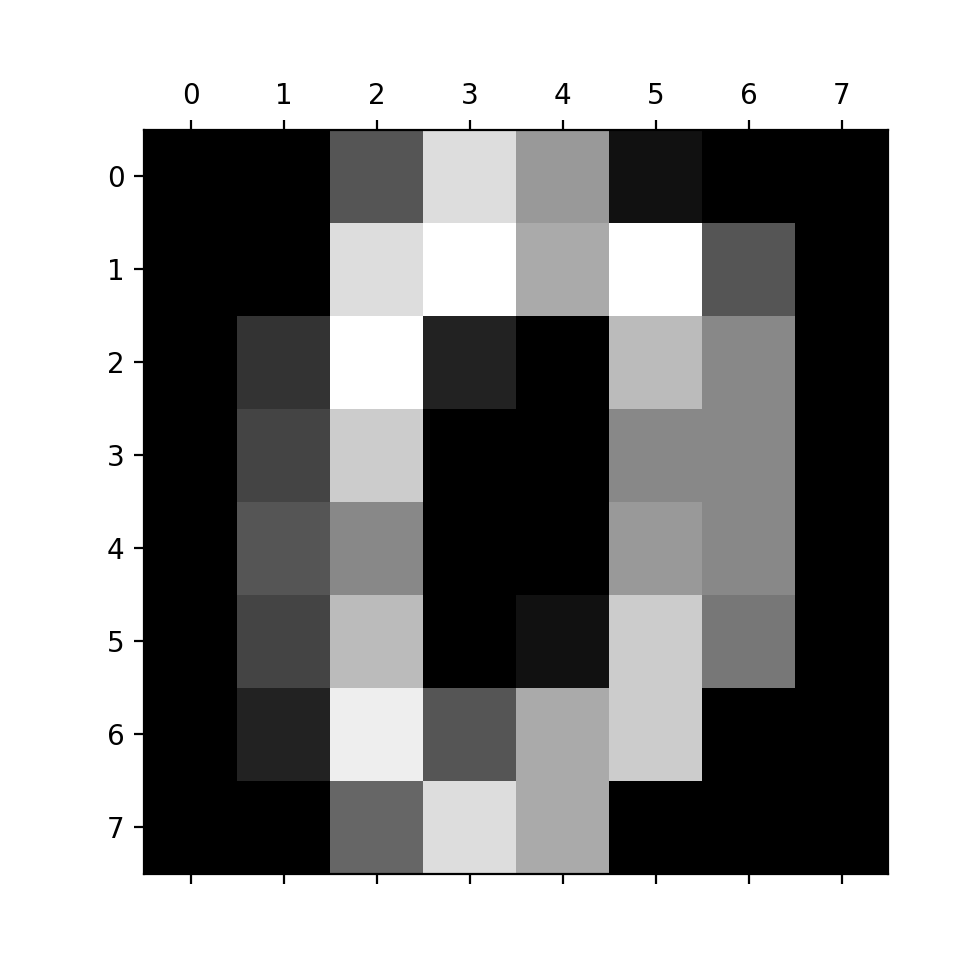

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
from xmlrpc.client import MAXINT
from xmlrpc.client import MININT
import copy
%matplotlib notebook
from sklearn.datasets import load_digits
from sklearn.metrics import fowlkes_mallows_score
digits = load_digits()
print(digits.data.shape)
plt.matshow(digits.images[0]) 
plt.gray() 
plt.show() 

In [619]:
len(digits.data)

1797

# K-means

In [591]:
def k_means(data, k, iters): 
    data = data.tolist()
    l = len(data[0])
    rep = random.sample(list(data),k)
        
    #for i in range(k):
        #for j in range(l):
            #rep[i].append(random.uniform(-4,4))
    
    
    #rep = [[random.uniform(0,4),random.uniform(-1,1)] for i in range(k)]
    for ite in range(iters):  
        cluster = [[] for i in range(k)]
        cluster_id = [[] for i in range(k)]
        for t in range(len(data)): #assign cluster
            #print(point)
            point = data[t]
            dist = [0]*k
            for j in range(k):
                s = 0
                for p in range(l):
                    s += (point[p]-rep[j][p])**2
                    #dist[j] = ((point[0]-rep[j][0])**2+(point[1]-rep[j][1])**2)**(1/2)
                dist[j] = s**(1/2)
            #print(dist)
            
            cluster[np.argmin(dist)].append(point)
            cluster_id[np.argmin(dist)].append(t)
            
        old_rep = copy.deepcopy(rep)
        for c in range(k):
            Sum = [0 for i in range(l)]
            for m in range(l):
                for n in cluster[c]:
                    Sum[m] += n[m]
                rep[c][m] = Sum[m]/len(cluster[c])
        if(old_rep == rep):
            return cluster
            break
    return cluster,cluster_id

In [7]:
def publicnum(num):
    dictnum = {}
    for i in range(len(num)):
        if num[i] in dictnum.keys():
            dictnum[num[i]] += 1
        else:
            dictnum.setdefault(num[i], 1)
    maxnum = 0
    maxkey = 0
    for k, v in dictnum.items():
        if v > maxnum:
            maxnum = v
            maxkey = k
    return maxkey

In [593]:
cluster,clusterid = k_means(digits.data,10,100)
cluster_name = []
target_label = []
for i in range(10):
    target = digits.target[clusterid[i]].tolist()
    cluster_name.append(publicnum(target))
    target_label.append(target)
    
true_label = []
predict_label = []
for T in range(10):
    for t in target_label[T]:
        true_label.append(t)
        predict_label.append(cluster_name[T])

[[177   0   0   0   1   0   0   0   0   0]
 [  0 131  22   1   0   1   3   0   0  24]
 [  1  11 148  13   0   0   0   2   0   2]
 [  0   6   1 155   0   2   0   7   0  12]
 [  1   3   0   0 167   1   0   9   0   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   5   0   0   0   0 175   0   0   0]
 [  0   2   0   0   0   1   0 176   0   0]
 [  0  95   6   6   0  15   2   4   0  46]
 [  0   1   0   5   3   7   0   8   0 156]]


<IPython.core.display.Javascript object>


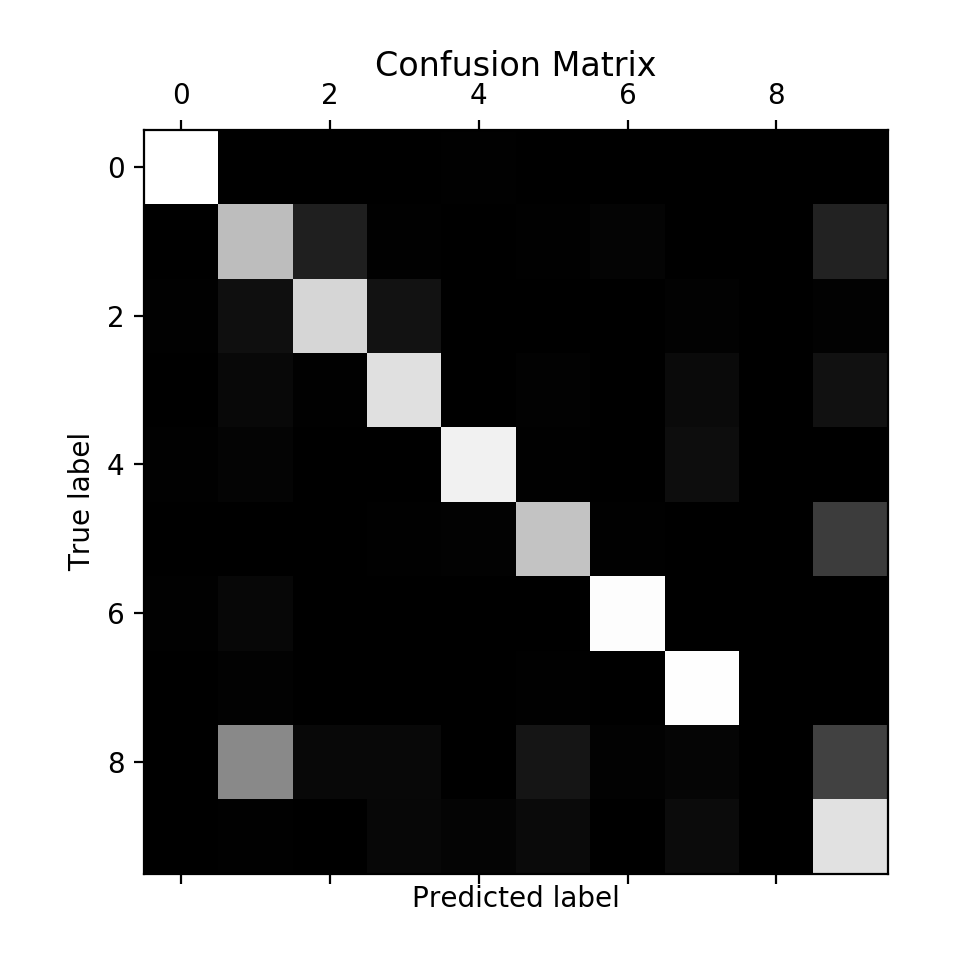

Text(0.5,0,'Predicted label')

In [594]:
from sklearn.metrics import confusion_matrix
labels = cluster_name
conf = confusion_matrix(true_label, predict_label)
print(conf)
plt.matshow(conf) #I use pl to generate an image
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [597]:
fowlkes_mallows_score(true_label, predict_label)

0.695927228289051

# Agglomerative clustering with Ward linkage

In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
hierarchical = AgglomerativeClustering(n_clusters=10, affinity='euclidean', memory=None, 
                                       connectivity=None, compute_full_tree='auto', linkage='ward', 
                                       pooling_func='deprecated')
clustering = hierarchical.fit(digits.data)

In [8]:
clustern = clustering.labels_.tolist()
datal = digits.data.tolist()
cluster = [[] for i in range(10)]
clusterid = [[] for i in range(10)]

for i in range(len(clustern)):
    cluster[clustern[i]].append(datal[i])
    clusterid[clustern[i]].append(i)
    
cluster_name = []
target_label = []
for i in range(10):
    target = digits.target[clusterid[i]].tolist()
    cluster_name.append(publicnum(target))
    target_label.append(target)
    
true_label = []
predict_label = []
for T in range(10):
    for t in target_label[T]:
        true_label.append(t)
        predict_label.append(cluster_name[T])

[[178   0   0   0   0   0   0   0   0   0]
 [  0 155  27   0   0   0   0   0   0   0]
 [  0   0 166   0   0   0   0   1  10   0]
 [  0   0   0 169   0   0   0   1  13   0]
 [  0   0   0   0 178   0   0   3   0   0]
 [  0   0   0   2   0 179   1   0   0   0]
 [  0   0   0   0   0   0 180   0   1   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   3   4   1   0   0   0   1 165   0]
 [  0  20   0 145   0   2   0  11   2   0]]


<IPython.core.display.Javascript object>


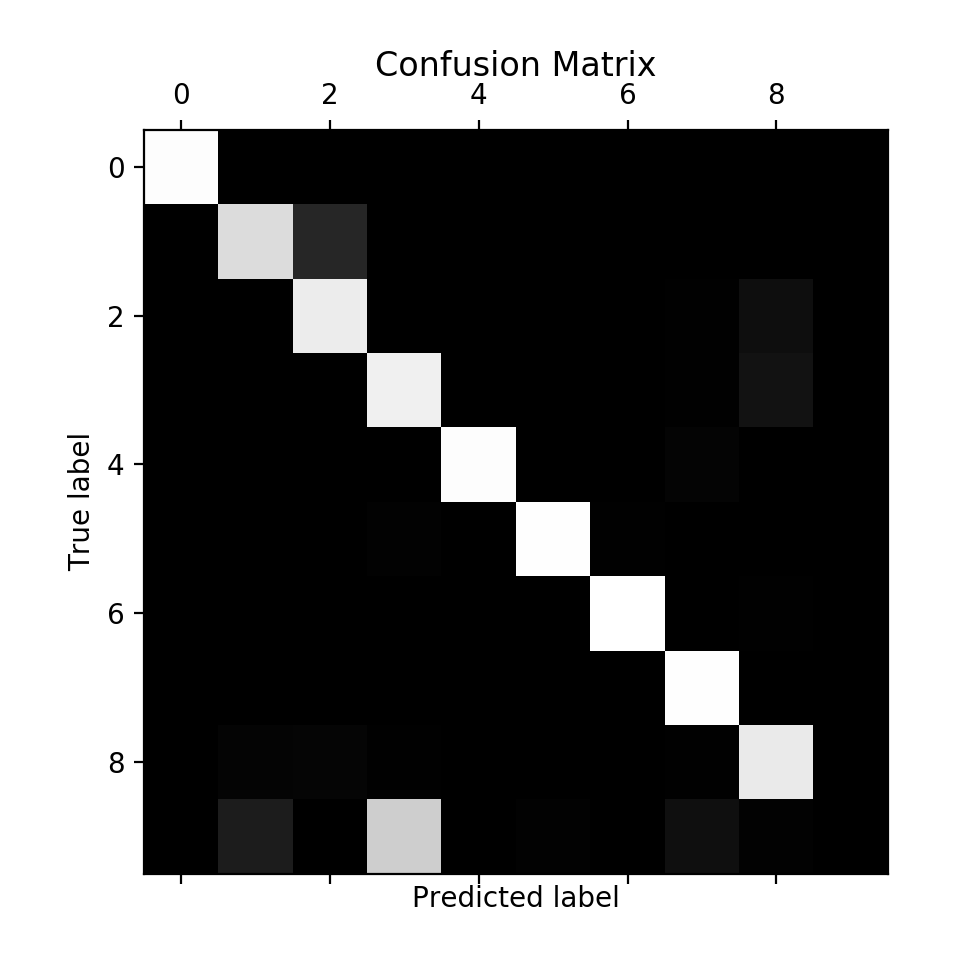

Text(0.5,0,'Predicted label')

In [613]:
from sklearn.metrics import confusion_matrix
labels = cluster_name
conf = confusion_matrix(true_label, predict_label)
print(conf)
plt.matshow(conf) #I use pl to generate an image
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [602]:
fowlkes_mallows_score(true_label, predict_label)

0.8321395046705493

# AffinityPropagation

In [614]:
from sklearn.cluster import AffinityPropagation

In [627]:
clustering = AffinityPropagation(preference = -50000).fit(digits.data)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [630]:
clustern = clustering.labels_.tolist()
datal = digits.data.tolist()
cl = len(set(clustering.labels_.tolist()))
cluster = [[] for i in range(cl)]
clusterid = [[] for i in range(cl)]

for i in range(len(clustern)):
    cluster[clustern[i]].append(datal[i])
    clusterid[clustern[i]].append(i)
    
cluster_name = []
target_label = []
for i in range(cl):
    target = digits.target[clusterid[i]].tolist()
    cluster_name.append(publicnum(target))
    target_label.append(target)
    
true_label = []
predict_label = []
for T in range(cl):
    for t in target_label[T]:
        true_label.append(t)
        predict_label.append(cluster_name[T])

[[176   0   0   0   1   0   1   0   0   0]
 [  0 157  22   0   0   2   0   0   0   1]
 [  2   8 140  10   0   0   0   9   0   8]
 [  1   0   2 139   0   5   0   6   0  30]
 [  0  19   0   0 154   2   0   6   0   0]
 [  3   2   0   4   1 104   7   2   0  59]
 [  1   7   0   0   0   1 172   0   0   0]
 [  0   9   0   0   0   0   0 170   0   0]
 [  7  94   3  29   1  22   0   5   0  13]
 [  9  17   0   7   0   4   0   8   0 135]]


<IPython.core.display.Javascript object>


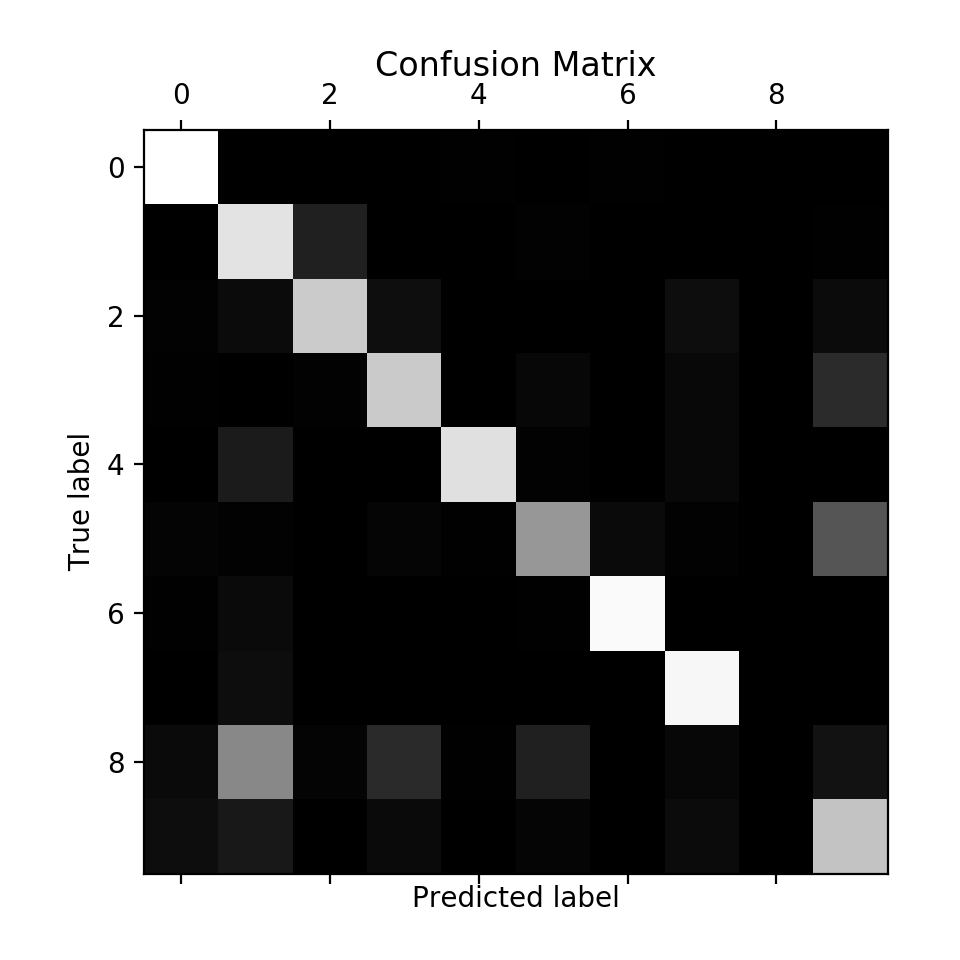

Text(0.5,0,'Predicted label')

In [631]:
from sklearn.metrics import confusion_matrix
labels = cluster_name
conf = confusion_matrix(true_label, predict_label)
print(conf)
plt.matshow(conf) #I use pl to generate an image
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [632]:
fowlkes_mallows_score(true_label, predict_label)

0.632772009747578